In [1]:
import numpy as np
import matplotlib.pylab as mpl
import matplotlib.pyplot as plt
import pandas as pd
import pickle as pkl
import scipy
import cmath
from scipy.io import loadmat

In [2]:
class matrix:
    def __init__(self,N):
        self.N=N

class directCycle(matrix):
    def __init__(self,N):
        super().__init__(N)
        self.A=np.tril(np.ones((self.N,self.N)),-1)-np.tril(np.ones((self.N,self.N)),-2)
        self.A[0,self.N-1] = 1

In [3]:
class fourier(matrix):
    def __init__(self,N):
        super().__init__(N)
        self.F=np.outer(np.arange(self.N),np.arange(self.N))
        self.F=(1/np.sqrt(N))*np.exp(2j*cmath.pi*self.F / self.N)

In [4]:
class GFT:
    def __init__(self,S):
        self.S=S
        [self.eigs,self.V]=np.linalg.eig(S)
        self.V=self.V[:,np.argsort(self.eigs)]
        self.eigs=np.sort(self.eigs)
        self.Lambda=np.diag(self.eigs)

    def computeGFT(self,x,k=None):
        xt=np.conj(self.V.T) @ x
        if k==None:
            return xt
        else:
            xtk = np.zeros_like(xt)
            xtk[np.argsort(np.abs(xt[:, 0]))[-k:], 0] = xt[np.argsort(np.abs(xt[:, 0]))[-k:], 0]
            return xtk

    def computeiGFT(self,xt, k=None):
        if k==None:
            return self.V@xt
        else:
            return self.V[:,np.argsort(np.abs(xt[:,0]))[-k:]]@xt[np.argsort(np.abs(xt[:,0]))[-k:],0]

    def computeTotalVariation(self,x):
        return x.T@(self.S)@x

2.1 Understanding the data

In [12]:
gene = loadmat("geneNetwork_rawPCNCI.mat")
histology = loadmat('histology_subtype.mat')
signal_mutation = loadmat('signal_mutation.mat')

In [6]:
gene = {k:v for k, v in gene.items() if k[0] != '_'}
df_gene = pd.DataFrame({k: np.array(v).flatten() for k, v in gene.items()})

In [7]:
df_gene

,geneNetwork_rawPCNCI
0,1
1,0
2,0
3,0
4,0
...,...
6041759,0
6041760,0
6041761,0
6041762,0


In [24]:
histology = {k:v for k, v in histology.items() if k[0] != '_'}
df_hist = pd.DataFrame({k: np.array(v).flatten() for k, v in histology.items()})
df_hist

,histology_subtype
0,1
1,2
2,2
3,2
4,2
...,...
235,1
236,1
237,1
238,1


In [27]:
signal_mutation = {k:v for k, v in signal_mutation.items() if k[0] != '_'}
df_mut = pd.DataFrame({k: np.array(v).flatten() for k, v in signal_mutation.items()})
df_mut

,signal_mutation
0,0
1,0
2,0
3,0
4,0
...,...
589915,0
589916,0
589917,0
589918,0


In [ ]:

loops = sum(diag(gN) ~= 0);
directed = ~issymmetric(gN);
wieghted = (max(max(gN)) > 1);
 

In [72]:
data_gene = list(gene.items())
np_gene = np.array(data_gene)

/var/folders/gj/ldtwgg_n0dngq84rgd6dmrdc0000gn/T/ipykernel_53628/3802358215.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np_gene = np.array(data_gene)


In [51]:
loops = np.sum(np.diag(df_gene!=0))
directed = 1
weighted = np.max(np.max(df_gene)>1)

In [73]:
np_gene_tr = np_gene.transpose()
# Comparing both arrays using array_equal() method
if np.array_equal(np_gene, np_gene_tr):
    print("The array is Symmetric")
else:
    print("The array is Not Symmetric")

The array is Not Symmetric


In [26]:
from scipy import sparse
gene_sparse = gene['geneNetwork_rawPCNCI'].astype(int)
gene_sparse = sparse.csr_matrix(gene)

TypeError: no supported conversion for types: (dtype('O'),)

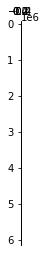

In [10]:
plt.spy(gene_sparse)